In [1]:
import os, sys
from pathlib import Path
import json

import matplotlib.pyplot as plt
import base64
import io

import numpy as np
import pandas as pd
import PIL

WORK_DIR = Path.cwd().parent

sys.path.append(str(WORK_DIR))

from src import (
    main,
    datasets,
    frames_tools,
    ollama_manager,
    prompt_formatters as pf
)
from src.STAR_utils.visualization_tools import qa_visualization as qaviz


In [2]:
STAR_TRAIN = WORK_DIR / "data/datasets/STAR/STAR_annotations/STAR_train.json"
STAR_VAL = WORK_DIR / "data/datasets/STAR/STAR_annotations/STAR_val.json"
STAR_TEST = WORK_DIR / "data/datasets/STAR/STAR_annotations/STAR_test.json"
STAR_SMALL = WORK_DIR / "data/datasets/STAR/STAR_annotations/STAR_val_small_1000.json"

RAW_FRAMES_DIR = WORK_DIR / "data/datasets/action-genome/frames"
KEYFRAMES_INFO_PATH = WORK_DIR / "data/datasets/STAR/Video_Keyframe_IDs.csv"

RAW_VIDEO_DIR = Path(WORK_DIR / 'data/datasets/action-genome/Charades_v1_480/')
SAVE_VIDEO_DIR = Path(WORK_DIR / "experiments/video_dump")


In [3]:
keyframes_info = frames_tools.extract_video_keyframes_info(KEYFRAMES_INFO_PATH)
len(keyframes_info)


60206

In [4]:
star_small_df = None
with open(STAR_SMALL) as f:
    star_small_df = pd.read_json(f)

star_small_df = star_small_df.drop_duplicates(subset=['question_id'])
star_small_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   question_id       1048 non-null   object 
 1   question          1048 non-null   object 
 2   video_id          1048 non-null   object 
 3   start             1048 non-null   float64
 4   end               1048 non-null   float64
 5   answer            1048 non-null   object 
 6   question_program  1048 non-null   object 
 7   choices           1048 non-null   object 
 8   situations        1048 non-null   object 
dtypes: float64(2), object(7)
memory usage: 73.8+ KB


In [5]:
test_dataset = star_small_df.iloc[:5].to_dict(orient='records')
video_info = frames_tools.preprocess_videos_metadata(test_dataset, keyframes_info)
len(video_info)


5

In [6]:
video_info[0]


{'question_id': 'Feasibility_T5_102',
 'video_id': 'ATV2F',
 'keyframes': ['000011',
  '000026',
  '000031',
  '000051',
  '000056',
  '000070',
  '000076',
  '000090']}

In [8]:
video_info[0]


{'question_id': 'Feasibility_T5_102',
 'video_id': 'ATV2F',
 'keyframes': ['000011',
  '000026',
  '000031',
  '000051',
  '000056',
  '000070',
  '000076',
  '000090']}

In [9]:
max_samples = 5
b64_frames = frames_tools.generate_frames(RAW_FRAMES_DIR, video_info[0], max_samples)
b64_frames


[{'frame_id': '000011',
  'encoding': 'iVBORw0KGgoAAAANSUhEUgAAAUAAAAHgCAIAAABb7iMTAAAACXBIWXMAAAABAAAAAQBPJcTWAAAQAElEQVR4nOzdB1RUabrw+2/de9c6697v3nNmpmemTaSCyoFQRc4555xzzjnnnLNEEQQkCCpJxKyYEEVEMYc2ITmo3T0z5zvnu8/eb1EUQVtnemZ65hzWf9XalHZQ+fm87967iv/x/k3Zlj68RpVAH9+UQugYPf/+TclGb4uglZlyaHGmDlp6V49amWtcW2h6v3jw43wrtLbYAb1f6FibP/xh7vD72fYPcw3Q6kztytuatVeVqy8r3j/Om51MeTISeqXV/mSV3WCZ1fEie+hoMdaxEoe+MqfBcvuhCocTlY7DVU4jVc7Q6RrnM7Uu52tdL9S5Xax3vdTgduWg69Vmt+uH3MbbPW93ek52ed3p9pw64nW31336mOf9o+4Pjnk8PO75uN/72QmfFyf9Xp7ye3Xa/81Z/5nzgXOXQhYuhy1dj4QWrkcujkUtjIXzWhqPhFZuRa5OREFrt6M/TEV/vBvzcSrux+nEH6eToR8epGA9Sv3xcdqfnmX++/MsCA7+8CQdnvnxQTr0x/uZ0I/3c7GmC3+4V/DhftGWPj4o3hI8+X66cO1eAbR8F2+qCK8EWr1XBq1Nl6MD7Pgu3mTR6u3C1VsFvFYmCrBnbhdDy5OFS7cLlm4XQSsTRcu3CuFHl2/lr9zEWrqVs3gzG5q/kQnNjWWgg9nr6dC7qxnQm6uZr69kvBxNQ724mIJ6dT7l5bnk784moV6cSXw+nPDsRPzjE3HTfZE32kPO1XkczXU7EGNaHWmQ6S6X46d0vMJn8kLcwpPKtXdtf1rt/bh4/cPCtcV3T5bnni3MveW1NvMC+n7+GrT6tGf2Xtv4QFlxtIWRLEORtJctKqAqTtVUkNJXkzPTljHXkbXVojsbSEY4MbNCVGsSd

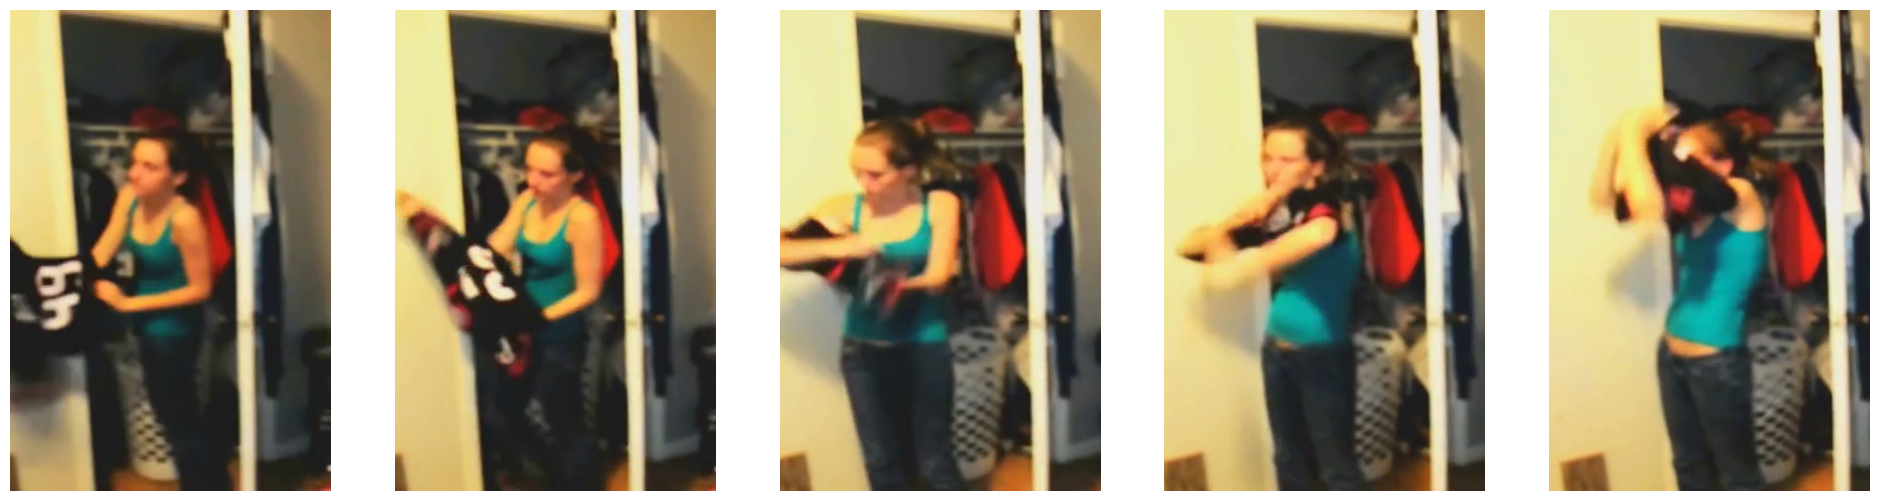

In [10]:
encodings = [frame['encoding'] for frame in b64_frames]

_, axs = plt.subplots(1, len(encodings), figsize=(24,8))

for img, ax in zip(encodings, axs):
    img = base64.b64decode(img)
    image = PIL.Image.open(io.BytesIO(img))
    image_np = np.array(image)  # Convert to NumPy array for Matplotlib
    ax.imshow(image_np)
    ax.axis('off')

plt.axis('off')  # Hide axes
plt.show()


In [11]:
# sys_file_path = WORK_DIR / "data/prompts/graph-gen/system_prompt.txt"
# sys_prompt = frames_tools._load_prompt_fromfile(sys_file_path)

model = "gemma3:4b-it-qat"
# model_options = _load_model_options()
ollama_params = {
    "model": model,
    "system": None,
    "stream": True,
    "options": {
        "num_ctx": 10240,
        "temperature": 0.1,
        "num_predict": 1024,
        "seed": 42,
    },
}

url = os.environ.get("OLLAMA_URL", "http://lusha_ollama:11435")
client = ollama_manager.OllamaRequestManager(url, ollama_params)


In [12]:
# pre-load the model
client.generate_completion("hello")


Hello there! How can I help you today? 😊 

Do you want to:

*   Ask me a question?
*   Start a conversation?
*   Have me write something (like a poem, story, or code)?
*   Just say hi?

Response at: 76.9 tk/s


'Hello there! How can I help you today? 😊 \n\nDo you want to:\n\n*   Ask me a question?\n*   Start a conversation?\n*   Have me write something (like a poem, story, or code)?\n*   Just say hi?'

In [ ]:
user_prompt = \
    """
    Describe what's happening in the the sequence of images
    """

pformatter = pf.PromptFormatter(user_prompt)
star_dataset = datasets.STARDataset(
    STAR_SMALL,
    pformatter
)



Dataset Statistics:
QA File: STAR_val_small_1000.json
Number of QA samples: 1048
QA sample keys: question_id, question, video_id, start, end, answer, question_program, choices, situations



In [14]:
samples = [star_dataset[i] for i in range(5)]
samples[0]['prompt']


"\n    Describe what's happening in the the sequence of images\n    "

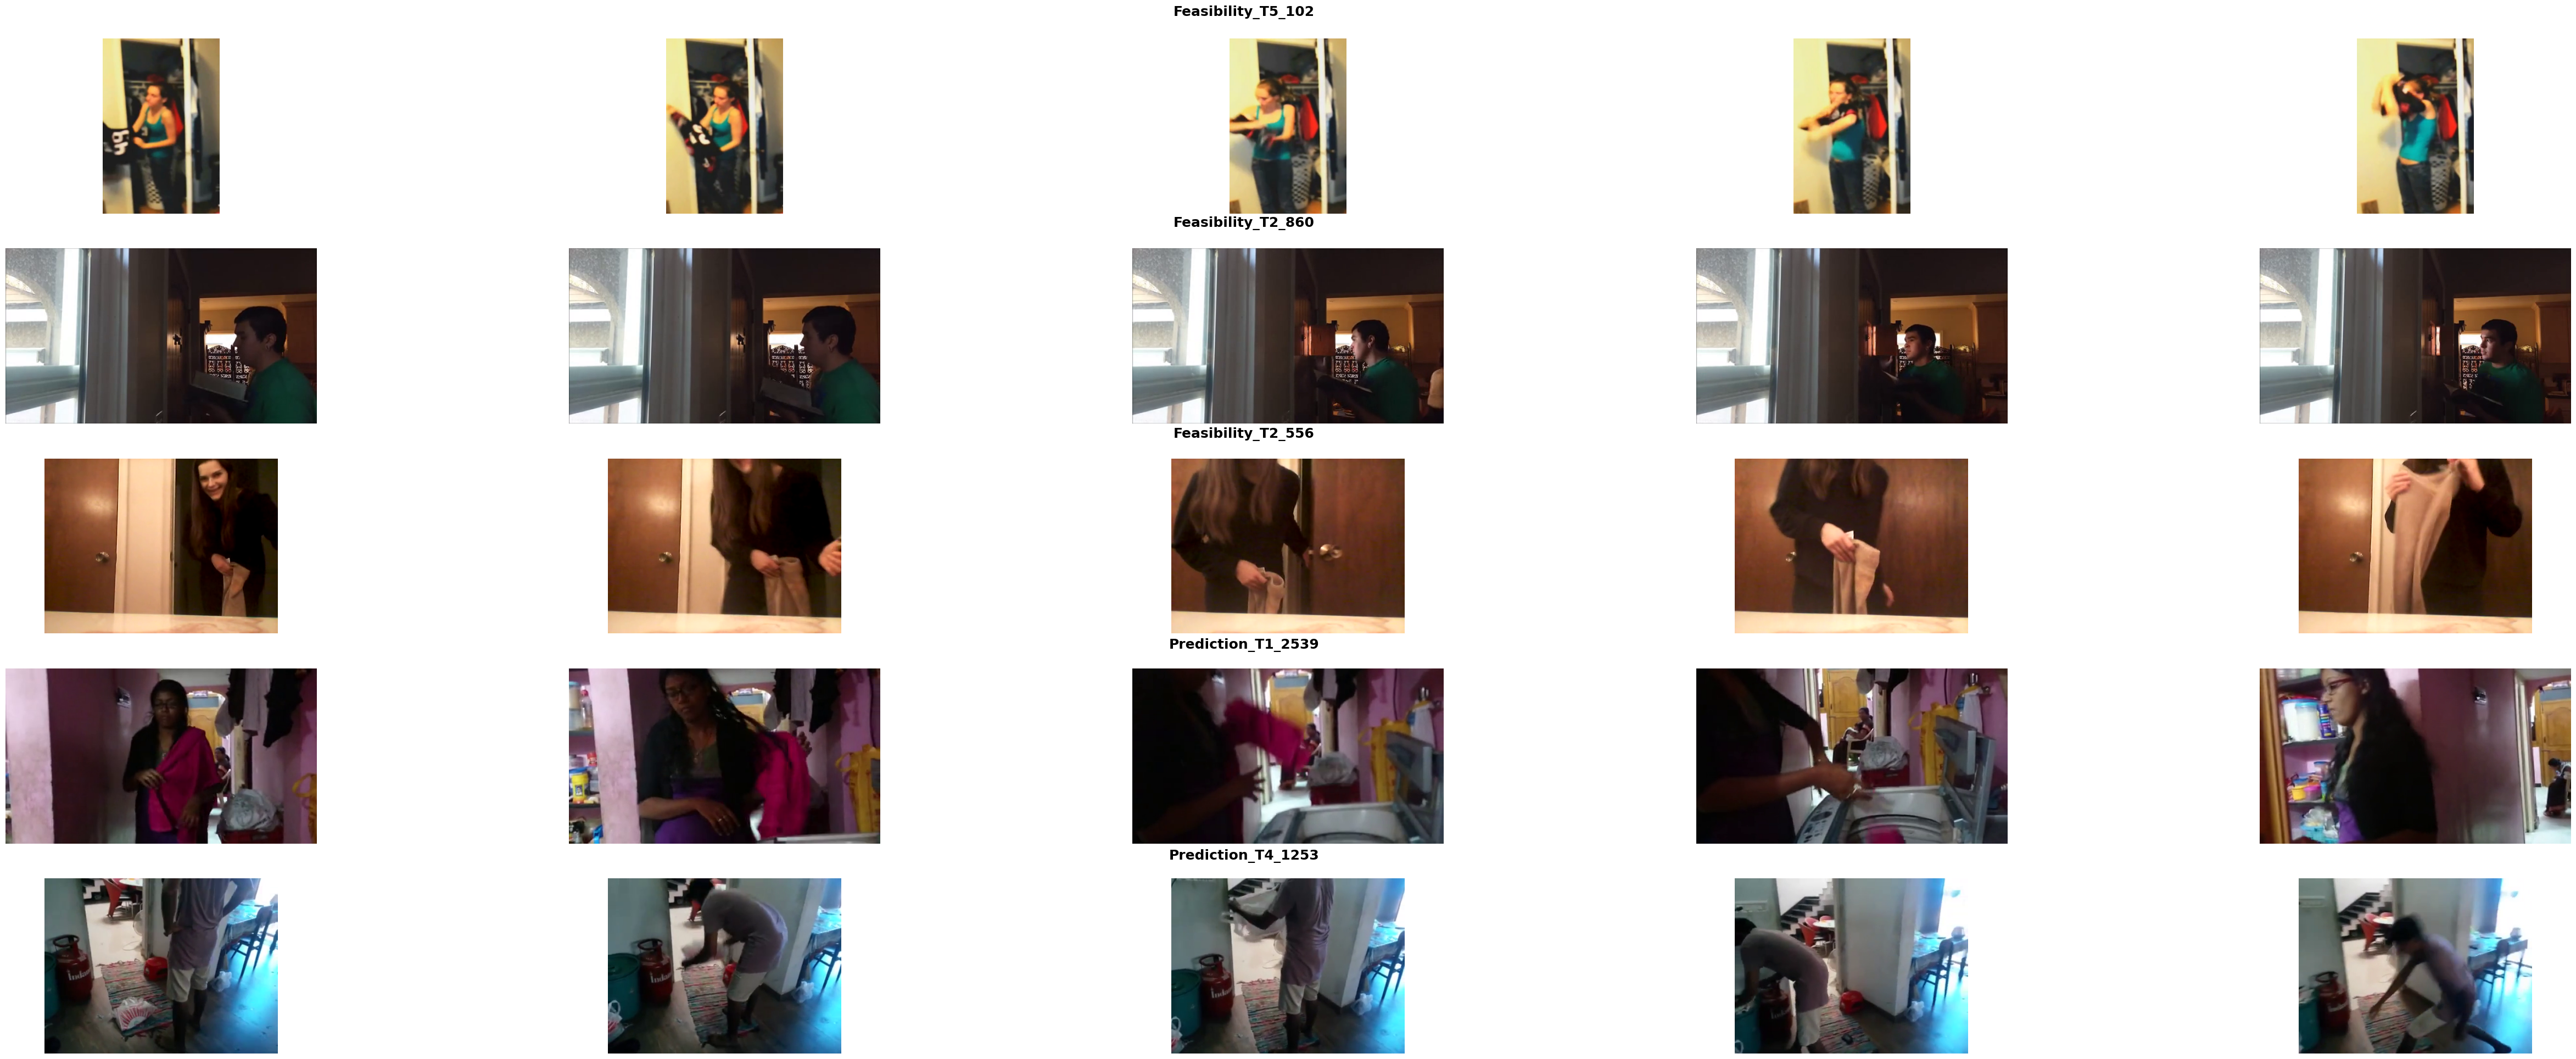

In [15]:
videos_info = frames_tools.preprocess_videos_metadata(samples, keyframes_info, filter=False)
max_sample = 5

fig, axs = plt.subplots(len(video_info), max_sample, figsize=(64,24))

for i, video in enumerate(videos_info):
    question_id = video['question_id']
    encodings = [frame['encoding'] for frame in frames_tools.generate_frames(RAW_FRAMES_DIR, video, max_sample)]

    # Add title above the row
    fig.text(0.5, 0.9 - (i * 0.8/len(videos_info)), 
             question_id, 
             ha='center', 
             va='center',
             fontsize=18.0,
             fontweight='bold'
             )
    
    for img, ax in zip(encodings, axs[i]):
        img = base64.b64decode(img)
        image = PIL.Image.open(io.BytesIO(img))
        image_np = np.array(image)  # Convert to NumPy array for Matplotlib
        ax.imshow(image_np)
        ax.axis('off')

plt.axis('off')  # Hide axes
plt.show()


In [ ]:
qaviz.Vis_Video(
    samples[2],
    RAW_VIDEO_DIR,
    SAVE_VIDEO_DIR)


In [17]:
video_info


[{'question_id': 'Feasibility_T5_102',
  'video_id': 'ATV2F',
  'keyframes': ['000011',
   '000026',
   '000031',
   '000051',
   '000056',
   '000070',
   '000076',
   '000090']},
 {'question_id': 'Feasibility_T2_860',
  'video_id': '9J166',
  'keyframes': ['000321',
   '000326',
   '000330',
   '000340',
   '000366',
   '000389',
   '000411',
   '000438',
   '000455',
   '000456',
   '000461',
   '000487',
   '000501']},
 {'question_id': 'Feasibility_T2_556',
  'video_id': 'ANA5N',
  'keyframes': ['000107',
   '000118',
   '000125',
   '000126',
   '000147',
   '000150',
   '000154',
   '000176',
   '000183',
   '000193',
   '000195',
   '000197',
   '000204',
   '000211',
   '000233',
   '000236',
   '000240']},
 {'question_id': 'Prediction_T1_2539',
  'video_id': 'Z6HEA',
  'keyframes': ['000021',
   '000043',
   '000050',
   '000060',
   '000062',
   '000100',
   '000103',
   '000105',
   '000126',
   '000139',
   '000143',
   '000282',
   '000292',
   '000295',
   '000316']},
 {'

In [57]:
video_info = frames_tools.preprocess_videos_metadata(samples, keyframes_info, filter=False)
main.stream_vqa(
    client,
    samples,
    "Therfore the final answer is",
    RAW_FRAMES_DIR,
    video_info,
    5, 
    WORK_DIR / 'notebooks/vqa_test.jsonl'
)


TypeError: list indices must be integers or slices, not str

In [20]:
usr_prompt = graph_gen._load_prompt_fromfile(WORK_DIR / "data/prompts/graph_gen/usr_prompt.txt")
reply = graph_gen._load_prompt_fromfile(WORK_DIR / "data/prompts/graph_gen/format_instructions.txt")
# Run frame generation
graph_gen.streaming_frame_generation(
    client,
    VIDEO_DIR, 
    "outputs/out_file.jsonl", 
    video_info=video_ids,
    usr_prompt=usr_prompt,
    reply=reply, 
    max_samples=10
)


Responses will be saved to: outputs/out_file.jsonl
Errors will be logged to: outputs/errors_20250523_17:32:30.txt
========================= Starting Response Generation =========================
Extracted frame at 0.10s: /tmp/tmpih8z81qz/frame_0000.jpg
Extracted frame at 3.58s: /tmp/tmpih8z81qz/frame_0001.jpg
Extracted frame at 7.16s: /tmp/tmpih8z81qz/frame_0002.jpg
Extracted frame at 10.74s: /tmp/tmpih8z81qz/frame_0003.jpg
Extracted frame at 14.32s: /tmp/tmpih8z81qz/frame_0004.jpg
Extracted frame at 17.91s: /tmp/tmpih8z81qz/frame_0005.jpg
Extracted frame at 21.49s: /tmp/tmpih8z81qz/frame_0006.jpg
Extracted frame at 25.07s: /tmp/tmpih8z81qz/frame_0007.jpg
Extracted frame at 28.65s: /tmp/tmpih8z81qz/frame_0008.jpg
Extracted frame at 32.13s: /tmp/tmpih8z81qz/frame_0009.jpg

Video: 0A8CF
 - interval: None-None
 - 10 frames.

Generating response for iteration 1 - id: 0A8CF
Okay, let's break down the image and describe the objects and their relationships.

**Objects Detected:**

1.  **Young

In [18]:
import prompt_formatters

prompt_formatter = prompt_formatters.OpenEndedPrompt("Q: {question}\nSTSG: {stsg}")
dataset = ollama_manager.PromptDataset("outputs/qa.json", prompt_formatter, "outputs/out_file.jsonl")


OSError: No such file or directory: 'outputs/qa.json'

In [19]:
dataset[0]


{'qid': 0,
 'prompt': 'Q: What is the boy holding?\nSTSG: \nFrame 0:\n\nyoung_man ---- sitting_at ---- table\ntable ---- supporting ---- notebook\nnotebook ---- containing ---- pen\npen ---- resting_on ---- notebook\nnotebook ---- positioned_in_front_of ---- young_man\npen ---- held_by ---- young_man\ntable ---- positioned_behind ---- young_man\nbag ---- hanging_behind ---- table\nbag ---- positioned_to_right_of ---- table\nbag ---- positioned_slightly_behind ---- young_man\ntable ---- on_floor ---- floor\nyoung_man ---- looking_at ---- notebook\nbag ---- hanging_on_wall ---- wall\n\nFrame 1:\n\nyoung_man ---- sitting_at ---- wooden_table\nwooden_table ---- on ---- floor\nyoung_man ---- wearing ---- white_tshirt\nyoung_man ---- wearing ---- black_shorts\nwhite_tshirt ---- part_of ---- young_man\nblack_shorts ---- part_of ---- young_man\nwhite_tshirt ---- adjacent_to ---- wooden_table\nblack_shorts ---- adjacent_to ---- wooden_table\nwooden_table ---- supporting ---- books\nbooks ---- o

In [11]:
cmd = f"{WORK_DIR}/src/graph_gen.py \
    --model gemma3:4b \
    --video-dir {WORK_DIR}/data/datasets/action-genome/Charades_v1_480 \
    --videos-metadata {WORK_DIR}/data/datasets/STAR/STAR_annotations/STAR_val.json\
    --output-file {WORK_DIR}/notebooks/outputs/out_file.jsonl \
    --usr-prompt {WORK_DIR}/data/prompts/graph_gen/usr_prompt.txt \
    --auto-reply {WORK_DIR}/data/prompts/graph_gen/format_instructions.txt \
    --max-samples 1"
    
%run {cmd}


=== Loading file with videos metadata: /home/lusha/star_code/data/datasets/STAR/STAR_annotations/STAR_val.json
Responses will be saved to: /home/lusha/star_code/notebooks/outputs/out_file.jsonl
Errors will be logged to: outputs/errors_20250520_14:34:46.txt
========================= Starting Response Generation =========================
Extracted frame at 15.35s: /tmp/tmpoj94_j3t/frame_0000.jpg

Video: 6H78U
 - interval: 11.1-19.6
 - 1 frames.

Generating response for iteration 1 - id: 6H78U
Okay, let's break down the image and analyze the objects and their relationships.

**Objects Detected:**

1.  **Man:** A young man is the primary subject, standing in the image.
2.  **Shirt:** He is wearing a white t-shirt.
3.  **Shorts:** He is wearing dark blue athletic shorts.
4.  **Sofa:** A large, ornate, brown and beige patterned sofa dominates the background. It has a high back and rolled arms.
5.  **Cushions:** Several cushions are arranged on the sofa, including a large, patterned cushion a

KeyboardInterrupt: 

In [16]:
import json

save_file = WORK_DIR / "notebooks/outputs/out_file.jsonl"

data = []
with open(save_file, 'r') as f:
    data = [json.loads(line) for line in f.readlines()]


In [13]:
data[0].keys()


dict_keys(['video_id', 'start', 'end', 'chat_history', 'stsg'])

In [14]:
data[0]['video_id'], data[0]['start'], data[0]['end']


('6H78U', 15.6, 22.7)

In [15]:
data[1]['video_id'], data[1]['start'], data[1]['end']


('RNLTR', 11.6, 16.4)

In [12]:
stsg_star = []
with open(f"{WORK_DIR}/data/datasets/STAR_QA_and_stsg_val.json") as f:
    stsg_star = json.load(f)


star_data = []
with open(f"{WORK_DIR}/data/datasets/STAR/STAR_annotations/STAR_val.json", 'r') as f:
    star_data = json.load(f)


In [13]:
same_order = True
for i, j in zip(stsg_star, star_data):
    test = i['question_id'] == j['question_id']
    same_order = same_order and test

same_order


True

In [10]:
def get_vocab_map(label_dir):
    vocab_map = dict()

    with open(label_dir) as in_file:
        for line in in_file.readlines():
            mapping = line.strip('\n')
            key, val = mapping.split(' ')
            vocab_map[key] = val
    
    return vocab_map

obj_vocab = get_vocab_map(WORK_DIR / 'data/datasets/STAR/STAR_annotations/class_maps/object_classes.txt')
rel_vocab = get_vocab_map(WORK_DIR / 'data/datasets/STAR/STAR_annotations/class_maps/relationship_classes.txt')

def generate_stsg(q_data):
    frame_ids = sorted(q_data['situations'].keys())

    stsg = []
    for f in frame_ids:
        frame_sg = []
        rels = q_data['situations'][f]['rel_labels']
        
        frame_sg.append(f"Frame {f}\n")
        for rel_pair, rel in zip(q_data['situations'][f]['rel_pairs'], rels):
            obj1, obj2 = rel_pair
            frame_sg.append(f'\t{obj_vocab[obj1]} --- {rel_vocab[rel]} --- {obj_vocab[obj2]}\n')
        
        frame_sg = ''.join(frame_sg)
        stsg.append(frame_sg)
    
    return stsg


In [15]:
print(''.join(generate_stsg(star_data[0])))


Frame 000198
	person --- on_the_side_of --- clothes
Frame 000202
	person --- in_front_of --- clothes
Frame 000205
	person --- in_front_of --- clothes
	person --- in_front_of --- blanket
Frame 000206
	person --- in_front_of --- towel
	person --- in_front_of --- clothes
	person --- in_front_of --- blanket
	person --- on_the_side_of --- blanket
Frame 000212
	person --- on_the_side_of --- towel
	person --- in_front_of --- towel
	person --- in_front_of --- clothes
	person --- on_the_side_of --- blanket
Frame 000217
	person --- in_front_of --- towel
	person --- on_the_side_of --- clothes
	person --- in_front_of --- blanket
	person --- on_the_side_of --- blanket
Frame 000218
	person --- in_front_of --- clothes
	person --- in_front_of --- blanket
	person --- on_the_side_of --- blanket
Frame 000221
	person --- in_front_of --- towel
	person --- in_front_of --- clothes
	person --- in_front_of --- blanket
Frame 000223
	person --- in_front_of --- towel
	person --- in_front_of --- clothes
	person --

In [19]:
new_stsg = []
for el in star_data:
    entry = {
        'question_id': el['question_id'],
        'video_id': el['video_id'],
        'start': el['start'],
        'end': el['end'],
        'stsg': ''.join(generate_stsg(el)),

    }
    new_stsg.append(entry)


In [20]:
print(new_stsg[0])


{'question_id': 'Interaction_T1_13', 'video_id': '6H78U', 'start': 11.1, 'end': 19.6, 'stsg': 'Frame 000198\n\tperson --- on_the_side_of --- clothes\nFrame 000202\n\tperson --- in_front_of --- clothes\nFrame 000205\n\tperson --- in_front_of --- clothes\n\tperson --- in_front_of --- blanket\nFrame 000206\n\tperson --- in_front_of --- towel\n\tperson --- in_front_of --- clothes\n\tperson --- in_front_of --- blanket\n\tperson --- on_the_side_of --- blanket\nFrame 000212\n\tperson --- on_the_side_of --- towel\n\tperson --- in_front_of --- towel\n\tperson --- in_front_of --- clothes\n\tperson --- on_the_side_of --- blanket\nFrame 000217\n\tperson --- in_front_of --- towel\n\tperson --- on_the_side_of --- clothes\n\tperson --- in_front_of --- blanket\n\tperson --- on_the_side_of --- blanket\nFrame 000218\n\tperson --- in_front_of --- clothes\n\tperson --- in_front_of --- blanket\n\tperson --- on_the_side_of --- blanket\nFrame 000221\n\tperson --- in_front_of --- towel\n\tperson --- in_front_

In [21]:
with  open(f"{WORK_DIR}/data/datasets/STAR_verbalized_stsg_val.json", 'w') as f:
    json.dump(new_stsg, f, indent=4)
